# Homework: Vaccine Distribution Network

###  Bus 36109 "Advanced Decision Modeling with Python", Don Eisenstein
Don Eisenstein &copy; Copyright 2021, University of Chicago

A vaccine is being produced at different manufacturing Plants to be distributed across the United States to various Hospitals. Each Plant first ships its vaccines to one or more Warehouses.  The Warehouses then ship the vaccines to the Hospitals.

Our task is to determine the quantities each Plant should ship to each Warehouse, and then the quantities each Warehouse should ship to each Hospital each week.  

There are 6 manufacturing plants, each with a limited weekly capacity (in cases) of vaccine doses. The location of each facility is represented as `(x, y)` map coordinates.

| Facility | Location   | Capacity |
| :---     |   :----:  |  ---: |
| Plant 1  | (123, 210) | 200    |
| Plant 2  | (40, 71)   | 50    |
| Plant 3  | (21, 185)  | 150    |
| Plant 4  | (129, 57)  | 40    |
| Plant 5  | (300, 12)  | 100    |
| Plant 6  | (281, 190) | 100    |

There are 3 warehouses. A plant must transport its vaccines to a warehouse first. Vaccines then travel from warehouses to hospitals.

Each Warehouse has a Capacity to move vaccine through its warehouse each week.  Capacity is in units of vaccine cases per week.  Each warehouse charges a processing cost per case of vaccine that flows through its facility.  Each warehouse must ship out weekly the same quantity of vaccines it receives, that is, we do not store or hold vaccine in a warehouse from one week to the next.

| Facility | Location   | Capacity | Unit Cost per Case
| :---     |   :----:  |  ---: | --: |
| Warehouse 1  | (52, 78) | 500    | 20 |
| Warehouse 2  | (200, 17)   | 250    | 25 |
| Warehouse 3  | (124, 49)  | 750    | 30 |


There are ten regional hospital networks in urgent need of vaccines. Their weekly quantities needed (in cases) and `(x, y)` map coordinates are shown below.

| Facility | Location   | Demand |
| :---     |   :----:  |  ---: |
| Hospital 1  | (41, 21) | 50    |
| Hospital 2  | (129, 44)   | 75    |
| Hospital 3  | (61, 210)  | 121    |
| Hospital 4  | (78, 47)  | 231    |
| Hospital 5  | (12, 90)  | 147    |
| Hospital 6  | (70, 250) | 190    |
| Hospital 7  | (63, 194)   | 100    |
| Hospital 8  | (199, 28)  | 151    |
| Hospital 9  | (351, 7)  | 49    |
| Hospital 10  | (222, 163)  | 172    |


Assumption:  You can assume, as this data indicates, that the total Plant capacity is no greater than the Hospital demand.

We estimate our cost of transportation by considering the *Rectilinear* distance between each Plant and Warehouse, and between each Warehouse and Hospital.  Rectilinear travel restricts movement along the horizontal (x) and vertical (y) axes. It is commonly used to approximate travel along a road grid.

The transportation cost is $1 per vaccine case traveling one unit of our map distance. The rectilinear distance between two points `(x_1, y_1)` and `(x_2, y_2)` is `abs(x_2 - x_1) + abs(y_2 - y_1)`.   The Python `abs` function returns the absolute value of a number.

For example, the distance between `(0, 0)` and `(1, 1)` is `abs(1 - 0) + abs(1 - 0) = 2`, and transporting `100` vaccine cases would therefore cost `100 cases * 2 distance units * $1/(case-distance) = $200`.

Each manufacturing plant and warehouse seeks to send as many cases as possible in order to meet hospital demand. Because vaccines are extremely valuable, hospitals should not receive any additional cases exceeding their immediate requirements.  Each manufacturing plant can ship vaccines to multiple warehouses, and each warehouse can send vaccine to multiple hospitals. And each hospital can receive vaccines from multiple warehouses. The number of vaccine cases sent and received should be modeled as a Continuous variable ... that is, one can ship a fraction of a case (This is to keep our model quick to solve, not to capture any realities of a transportation network).

Our model will answer the following question:

**What is the optimal allocation of vaccine cases that best meets hospital needs while minimizing total transportation and warehousing costs? In other words, how many cases of vaccines should each manufacturing plant send to each warehouse, and each warehouse to each hospital?**

**NOTE:  Make all your flow variables Continuous.  That is, it is fine to ship a fraction of a case of vaccine.**

Follow the notebook to walk you through the solution in parts.  Insert your answer to each part into the notebook below the question for each part.

# Your Solution

Insert your answer to each part into this notebook

In [1]:
#! pip install pulp

In [2]:
import pulp

**1. In broad terms, what are the variables, objective and constraints of this problem? You don't need to list the entire formulation. Just describe the structure/characteristics of your model.**

Variables:
There are several variables including:

*   amount from plant to warehouse
*   amount from warehouse to hospital
*   demand of vaccines from hospital
*   unit cost and transportation cost



Constraints:


*   Capacity of Each Plant
*   Capacity of Each Warehouse
*  Vaccines must flow from plant -> warehouse -> hospital



**2.  Create a Python List called `plants` to store the information about the plants.   
Each element of the List should be a Dictionary that will have Keys `name`, `capacity`, `x` and `y`.**

**Create a List called `hospitals`.  Each element of the List will be a Dictionary with keys `name`, `demand`, `x` and `y`.**

**Finally create a List called `warehouses`.  Each element of the List will be a Dictionary with keys `name`, `capacity`, `processing_cost', `x` and `y`.**


In [3]:
#PLANTS ---------------------
plants = [
    {'name': 'plant_1',
     'x': 123,
     'y': 210,
     'capacity': 200
    },
    {'name': 'plant_2',
     'x': 40,
     'y': 71,
     'capacity': 50
    },
    {'name': 'plant_3',
     'x': 21,
     'y': 185,
     'capacity': 150
    },
    {'name': 'plant_4',
     'x': 129,
     'y': 57,
     'capacity': 40
    },
    {'name': 'plant_5',
     'x': 300,
     'y': 12,
     'capacity': 100
    },
    {'name': 'plant_6',
     'x': 281,
     'y': 190,
     'capacity': 100
    }
]

#Hospitals -----------------------------
hospitals = [
    {'name': 'hospital_1',
     'x': 41,
     'y': 21,
     'demand': 50
    },
    {'name': 'hospital_2',
     'x': 129,
     'y': 44,
     'demand': 75
    },
    {'name': 'hospital_3',
     'x': 61,
     'y': 210,
     'demand': 121
    },
    {'name': 'hospital_4',
     'x': 78,
     'y': 47,
     'demand': 231
    },
    {'name': 'hospital_5',
     'x': 12,
     'y': 90,
     'demand': 147
    },
    {'name': 'hospital_6',
     'x': 70,
     'y': 250,
     'demand': 190
    },
    {'name': 'hospital_7',
     'x': 63,
     'y': 194,
     'demand': 100
    },
    {'name': 'hospital_8',
     'x': 199,
     'y': 28,
     'demand': 151
    },
    {'name': 'hospital_9',
     'x': 351,
     'y': 7,
     'demand': 49
    },
    {'name': 'hospital_10',
     'x': 222,
     'y': 163,
     'demand': 172
    },
]

#WAREHOUSES

warehouses = [
    {'name': 'warehouse_1',
     'x': 52,
     'y': 78,
     'capacity': 500,
     'unit_cost': 20
    },
    {'name': 'warehouse_2',
     'x': 200,
     'y': 17,
     'capacity': 250,
     'unit_cost': 25
    },
    {'name': 'warehouse_3',
     'x': 124,
     'y': 49,
     'capacity': 750,
     'unit_cost': 30
    },
]

**3. Create a PuLP LpProblem object and store it in the variable `model`.**

In [4]:
#MODEL
model = pulp.LpProblem('VaccineDistributionWithWarehouse', pulp.LpMinimize)

**4. Create a Dictionary `lp_variables` and store in it each PuLP variable.  Each key in the Dictionary should be a Tuple. NOTE: You should have a flow variables only for each Plant-Warehouse combination and for each Warehouse-Hospital combination.  You should NOT have any single variables that contain flow all the way from a Plant through a Warehouse to a Hospital.**

In [5]:
lp_variables_p_w = {}

for plant in plants:
    for warehouse in warehouses:
        # Create a dictionary entry referencing the decision variable for this plant-hospital pair
        lp_variables_p_w[(plant['name'], warehouse['name'])] = pulp.LpVariable(f"{plant['name']}_{warehouse['name']}", cat='Continuous', lowBound=0)

lp_variables_w_h = {}

for warehouse in warehouses:
    for hospital in hospitals:
        # Create a dictionary entry referencing the decision variable for this plant-hospital pair
        lp_variables_w_h[(warehouse['name'], hospital['name'])] = pulp.LpVariable(f"{warehouse['name']}_{hospital['name']}", cat='Continuous', lowBound=0)

In [6]:
#MEREG DICTIONARIES INTO ONE
lp_variables = lp_variables_p_w | lp_variables_w_h

**5. Add your objective function to your `model`**

In [7]:
P = pulp.LpVariable("P", cat='Continuous', lowBound=0, upBound=1.0)

In [8]:
transportation_cost_objective_plant_to_warehouse = 0

for plant in plants:
    for warehouse in warehouses:
      # Calculate the distance between the hospital and warehouse
      distance_cost = abs(plant['x'] - warehouse['x']) + abs(plant['y'] - warehouse['y'])

      # Add the distance cost multiplied by the variable value to our cost objective
      transportation_cost_objective_plant_to_warehouse += lp_variables[(plant['name'], warehouse['name'])] * distance_cost





transportation_cost_objective_warehouse_to_hospital = 0

for warehouse in warehouses:
    for hospital in hospitals:
      # Calculate the distance between the hospital and warehouse
      distance_cost = abs(warehouse['x'] - hospital['x']) + abs(warehouse['y'] - hospital['y']) + (warehouse['unit_cost'])

      # Add the distance cost multiplied by the variable value to our cost objective
      transportation_cost_objective_warehouse_to_hospital += lp_variables[(warehouse['name'], hospital['name'])] * distance_cost



#COMBINE CONTRAINTS
transportation_objective = (transportation_cost_objective_plant_to_warehouse + transportation_cost_objective_warehouse_to_hospital)

# Add the total transportation cost to our model as its minimization objective
model += transportation_objective, 'Minimize transportation cost'

**6. Add the constraints to your `model`**

In [9]:
#------------ PLANT CAPACITY ----------------------------
for plant in plants:
  plant_capacity_const = 0


  for warehouse in warehouses:
    plant_capacity_const += lp_variables[(plant['name'], warehouse['name'])]
  model += plant_capacity_const <= plant['capacity'], f"{plant['name']}_capacity"

In [10]:
#--------- WAREHOUSE CAPACITY --------------------------
for warehouse in warehouses:
  warehouse_capacity_const = 0

  for hospital in hospitals:
    warehouse_capacity_const += lp_variables[(warehouse['name'], hospital['name'])]
  model += warehouse_capacity_const <= warehouse['capacity'], f"{warehouse['name']}_capacity"

In [11]:
#------ HOSPITAL DEMAND ------------------------------
# The cases of vaccine into every hospital cannot exceed its demand
for hospital in hospitals:
    hospital_demand = 0

    for warehouse in warehouses:
        hospital_demand += lp_variables[(warehouse['name'], hospital['name'])]


    model += hospital_demand <= hospital['demand'], f"{hospital['name']}_demand"

In [12]:
# ------ WAREHOUSE FLOW -----------------------
for warehouse in warehouses:
    vac_in = 0
    vac_out = 0
    for plant in plants:
        vac_in += lp_variables[(plant['name'], warehouse['name'])]
    for hospital in hospitals:
        vac_out += lp_variables[(warehouse['name'], hospital['name'])]
    model += vac_in == vac_out, f"{warehouse['name']}_balance"

In [13]:
# ------ TOTAL VACCINE SUPPLY ----------------
total_vaccine_supply = 0
for plant in plants:
    for warehouse in warehouses:
        total_vaccine_supply += lp_variables[(plant['name'], warehouse['name'])]

model += total_vaccine_supply == 640, "Total_Vaccine_Supply"

**7. Display your model with `print(model)`, check that all is OK**

In [14]:
print(model)

VaccineDistributionWithWarehouse:
MINIMIZE
203*plant_1_warehouse_1 + 270*plant_1_warehouse_2 + 162*plant_1_warehouse_3 + 19*plant_2_warehouse_1 + 214*plant_2_warehouse_2 + 106*plant_2_warehouse_3 + 138*plant_3_warehouse_1 + 347*plant_3_warehouse_2 + 239*plant_3_warehouse_3 + 98*plant_4_warehouse_1 + 111*plant_4_warehouse_2 + 13*plant_4_warehouse_3 + 314*plant_5_warehouse_1 + 105*plant_5_warehouse_2 + 213*plant_5_warehouse_3 + 341*plant_6_warehouse_1 + 254*plant_6_warehouse_2 + 298*plant_6_warehouse_3 + 88*warehouse_1_hospital_1 + 275*warehouse_1_hospital_10 + 131*warehouse_1_hospital_2 + 161*warehouse_1_hospital_3 + 77*warehouse_1_hospital_4 + 72*warehouse_1_hospital_5 + 210*warehouse_1_hospital_6 + 147*warehouse_1_hospital_7 + 217*warehouse_1_hospital_8 + 390*warehouse_1_hospital_9 + 188*warehouse_2_hospital_1 + 193*warehouse_2_hospital_10 + 123*warehouse_2_hospital_2 + 357*warehouse_2_hospital_3 + 177*warehouse_2_hospital_4 + 286*warehouse_2_hospital_5 + 388*warehouse_2_hospital_6 + 

**8. Solve your optimization model and print its status and the optimal objective function value (the total transportation cost).  NOTE: Your optimal objective function value should be 132966.0**

In [15]:
model.solve()
print("Status:", pulp.LpStatus[model.status])
if (pulp.LpStatus[model.status] == 'Optimal'):
    print("Obj function value:", model.objective.value(), "\n")

Status: Optimal
Obj function value: 132966.0 



**9. Output the value of each of your variables at optimality.**

In [16]:
for v in model.variables():
    if v.varValue > 0:
        print(v, v.varValue)

plant_1_warehouse_3 200.0
plant_2_warehouse_1 50.0
plant_3_warehouse_1 150.0
plant_4_warehouse_3 40.0
plant_5_warehouse_2 100.0
plant_6_warehouse_2 51.0
plant_6_warehouse_3 49.0
warehouse_1_hospital_1 36.0
warehouse_1_hospital_4 17.0
warehouse_1_hospital_5 147.0
warehouse_2_hospital_8 151.0
warehouse_3_hospital_2 75.0
warehouse_3_hospital_4 214.0


**10. Use Python to list each Hospital's Demand, suppy of vaccine, shortfall (amount shy of demand), and percent of demand filled.**

In [17]:
for hospital in hospitals:
    name =  hospital['name']
    demand = hospital['demand']
    constraint_name = f"{name}_demand"
    slack = model.constraints[constraint_name].slack
    print(f"Hospital {name:<15}    supply: {demand-slack:>8.2f}     demand:{demand:>8.2f}    shorfall:{slack:>8.2f}  percent:{(demand-slack)/demand:>6.2f}")

Hospital hospital_1         supply:    36.00     demand:   50.00    shorfall:   14.00  percent:  0.72
Hospital hospital_2         supply:    75.00     demand:   75.00    shorfall:   -0.00  percent:  1.00
Hospital hospital_3         supply:     0.00     demand:  121.00    shorfall:  121.00  percent:  0.00
Hospital hospital_4         supply:   231.00     demand:  231.00    shorfall:   -0.00  percent:  1.00
Hospital hospital_5         supply:   147.00     demand:  147.00    shorfall:   -0.00  percent:  1.00
Hospital hospital_6         supply:     0.00     demand:  190.00    shorfall:  190.00  percent:  0.00
Hospital hospital_7         supply:     0.00     demand:  100.00    shorfall:  100.00  percent:  0.00
Hospital hospital_8         supply:   151.00     demand:  151.00    shorfall:   -0.00  percent:  1.00
Hospital hospital_9         supply:     0.00     demand:   49.00    shorfall:   49.00  percent:  0.00
Hospital hospital_10        supply:     0.00     demand:  172.00    shorfall:  172

**11. We now want to understand the impact of our transportation costs as we constrain the
percent of demand satisfied for all hospitals.  Reformulate your model to ensure that the percent of demand satisfied
to each hospital is at least 20%.  Resolve your model and output the objective function value and hospital supply/demand stats as you did in Part 10.**

In [18]:
#Define MODEL2 for 20% of Hospital demand constraint
model2 = pulp.LpProblem('VaccineDistributionWithWarehouse', pulp.LpMinimize)

#Add objective function
model2 += transportation_objective, 'Minimize transportation cost'

#---------------------------------------------------------------------
#-------------- CONSTRAINTS ------------------------------------------
#---------------------------------------------------------------------

#------------ PLANT CAPACITY ----------------------------
for plant in plants:
  plant_capacity_const = 0


  for warehouse in warehouses:
    plant_capacity_const += lp_variables[(plant['name'], warehouse['name'])]
  model2 += plant_capacity_const <= plant['capacity'], f"{plant['name']}_capacity"

#--------- WAREHOUSE CAPACITY --------------------------
for warehouse in warehouses:
  warehouse_capacity_const = 0

  for hospital in hospitals:
    warehouse_capacity_const += lp_variables[(warehouse['name'], hospital['name'])]
  model2 += warehouse_capacity_const <= warehouse['capacity'], f"{warehouse['name']}_capacity"

#------ HOSPITAL DEMAND ------------------------------
# The cases of vaccine into every hospital cannot exceed its demand
for hospital in hospitals:
    hospital_demand = 0

    for warehouse in warehouses:
        hospital_demand += lp_variables[(warehouse['name'], hospital['name'])]


    model2 += hospital_demand <= hospital['demand'], f"{hospital['name']}_demand"

# ------ WAREHOUSE FLOW -----------------------
for warehouse in warehouses:
    vac_in = 0
    vac_out = 0
    for plant in plants:
        vac_in += lp_variables[(plant['name'], warehouse['name'])]
    for hospital in hospitals:
        vac_out += lp_variables[(warehouse['name'], hospital['name'])]
    model2 += vac_in == vac_out, f"{warehouse['name']}_balance"

# ------ TOTAL VACCINE SUPPLY ----------------
total_vaccine_supply = 0
for plant in plants:
    for warehouse in warehouses:
        total_vaccine_supply += lp_variables[(plant['name'], warehouse['name'])]

model2 += total_vaccine_supply == 640, "Total_Vaccine_Supply"

In [19]:
# ------ 20% of HOSPITAL DEMAND MUST BE SATISFIED -------

for hospital in hospitals:
  min_demand = 0
  for warehouse in warehouses:
    min_demand += lp_variables[(warehouse['name'], hospital['name'])]
  model2 += min_demand >= hospital['demand'] * 0.2, f"{hospital['name']}_min_demand"

In [20]:
model2.solve()
print("Status:", pulp.LpStatus[model.status])
if (pulp.LpStatus[model.status] == 'Optimal'):
    print("Obj function value:", model.objective.value(), "\n")

Status: Optimal
Obj function value: 144432.4 



In [21]:
for hospital in hospitals:
    name =  hospital['name']
    demand = hospital['demand']
    constraint_name = f"{name}_demand"
    slack = model2.constraints[constraint_name].slack
    print(f"Hospital {name:<15}    supply: {demand-slack:>8.2f}     demand:{demand:>8.2f}    shorfall:{slack:>8.2f}  percent:{(demand-slack)/demand:>6.2f}")

Hospital hospital_1         supply:    10.00     demand:   50.00    shorfall:   40.00  percent:  0.20
Hospital hospital_2         supply:    75.00     demand:   75.00    shorfall:   -0.00  percent:  1.00
Hospital hospital_3         supply:    24.20     demand:  121.00    shorfall:   96.80  percent:  0.20
Hospital hospital_4         supply:   169.80     demand:  231.00    shorfall:   61.20  percent:  0.74
Hospital hospital_5         supply:   107.80     demand:  147.00    shorfall:   39.20  percent:  0.73
Hospital hospital_6         supply:    38.00     demand:  190.00    shorfall:  152.00  percent:  0.20
Hospital hospital_7         supply:    20.00     demand:  100.00    shorfall:   80.00  percent:  0.20
Hospital hospital_8         supply:   151.00     demand:  151.00    shorfall:   -0.00  percent:  1.00
Hospital hospital_9         supply:     9.80     demand:   49.00    shorfall:   39.20  percent:  0.20
Hospital hospital_10        supply:    34.40     demand:  172.00    shorfall:  137

**12. Now form a plot.  Vary P along the x-axis from 0 to 1 in steps of 0.05.
Plot the Optimal objective function value for each P along the y-axis.**

In [22]:
# Iterate over P
#
P_list = []
Obj_Value_list = []
#
num_steps = 20
# Set range to include (0, 1, 2, ...,num_steps+1)
for step in range(num_steps+1):
    P = step/num_steps
    P_list.append(P)

#  Add P constraints back in
    for hospital in hospitals:
        const = None
        for warehouse in warehouses:
        # Add the plant-hospital decision variable to our total hospital received amount
            const += lp_variables[(warehouse['name'], hospital['name'])]

        # Now that we've looped through all plants for this hospital, we add this constraint to our model
            #model2 += const >= P*hospital['demand'], f"{hospital['name']}_percent"

#     print(model)
    model2.solve(pulp.PULP_CBC_CMD(msg=0))
    #print("Percent:", P)
    #print("Status:", pulp.LpStatus[model2.status])
    if (pulp.LpStatus[model2.status] == 'Optimal'):
        #print("Obj function value:", model2.objective.value(), "\n")
        Obj_Value_list.append(model2.objective.value())
    else:
        Obj_Value_list.append(None)

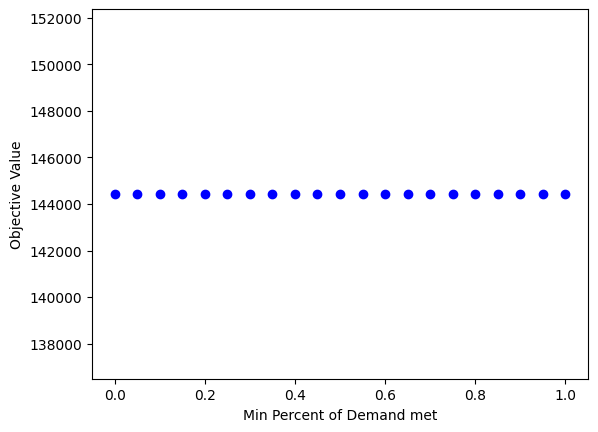

In [23]:
import matplotlib.pyplot as plt

plt.plot(P_list,Obj_Value_list,"bo")
plt.ylabel('Objective Value');
plt.xlabel('Min Percent of Demand met');
plt.show()